In [3]:
import pandas as pd
# file name 합치기
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from sklearn.model_selection import train_test_split
# 시각화
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from skimage import io, feature
from skimage.transform import resize
import cv2
from PIL import ImageChops

import seaborn as sns

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
대기오염2019 = pd.read_csv("./데이터파일/서울특별시 미세먼지 데이터(5개년)/일별평균대기오염도_2019.csv",encoding='EUC-KR')
대기오염2020 = pd.read_csv("./데이터파일/서울특별시 미세먼지 데이터(5개년)/일별평균대기오염도_2020.csv",encoding='EUC-KR')
대기오염2021 = pd.read_csv("./데이터파일/서울특별시 미세먼지 데이터(5개년)/일별평균대기오염도_2021.csv",encoding='EUC-KR')
대기오염2022 = pd.read_csv("./데이터파일/서울특별시 미세먼지 데이터(5개년)/일별평균대기오염도_2022.csv",encoding='EUC-KR')
대기오염2023 = pd.read_csv("./데이터파일/서울특별시 미세먼지 데이터(5개년)/일별평균대기오염도_2023.csv",encoding='EUC-KR')

In [5]:
대기오염전체 = pd.concat([대기오염2019, 대기오염2020,대기오염2021,대기오염2022,대기오염2023],axis=0)

In [6]:
에너지2019 = pd.read_csv("./데이터파일/서울특별시 에너지사용량 데이터(5개년)/ECO_DATA_TOTAL_STATS_2019.csv",encoding='EUC-KR')
에너지2020 = pd.read_csv("./데이터파일/서울특별시 에너지사용량 데이터(5개년)/ECO_DATA_TOTAL_STATS_2020.csv",encoding='EUC-KR')
에너지2021 = pd.read_csv("./데이터파일/서울특별시 에너지사용량 데이터(5개년)/ECO_DATA_TOTAL_STATS_2021.csv",encoding='EUC-KR')
에너지2022 = pd.read_csv("./데이터파일/서울특별시 에너지사용량 데이터(5개년)/ECO_DATA_TOTAL_STATS_2022.csv",encoding='EUC-KR')
에너지2023 = pd.read_csv("./데이터파일/서울특별시 에너지사용량 데이터(5개년)/ECO_DATA_TOTAL_STATS_2023.csv",encoding='EUC-KR')

In [7]:
에너지전체 = pd.concat([에너지2019, 에너지2020,에너지2021,에너지2022,에너지2023],axis=0)

In [8]:
평균기온 = pd.read_excel("./데이터파일/서울특별시_월별 평균기온 데이터(5개년).xlsx")
법정동별에너지 = pd.read_csv("./데이터파일/서울특별시_자치구 법정동별 에너지사용량 통계_주거용_20230512.csv",encoding='EUC-KR')

In [9]:
대기오염2019.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20190101,강남구,0.027,0.013,0.6,0.005,35.0,30.0
1,20190101,강남대로,0.040,0.010,0.9,0.004,38.0,26.0
2,20190101,강동구,0.037,0.012,0.7,0.005,40.0,30.0
3,20190101,강변북로,0.045,0.010,0.5,0.005,43.0,26.0
4,20190101,강북구,0.024,0.020,0.6,0.003,44.0,28.0


In [10]:
대기오염2019

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20190101,강남구,0.027,0.013,0.6,0.005,35.0,30.0
1,20190101,강남대로,0.040,0.010,0.9,0.004,38.0,26.0
2,20190101,강동구,0.037,0.012,0.7,0.005,40.0,30.0
3,20190101,강변북로,0.045,0.010,0.5,0.005,43.0,26.0
4,20190101,강북구,0.024,0.020,0.6,0.003,44.0,28.0
...,...,...,...,...,...,...,...,...
17740,20191231,청계천로,0.017,0.022,0.4,0.003,24.0,17.0
17741,20191231,한강대로,0.021,0.017,0.4,0.003,26.0,12.0
17742,20191231,행주,0.005,0.031,0.6,0.004,28.0,12.0
17743,20191231,홍릉로,0.026,0.017,0.5,0.004,27.0,16.0


In [11]:
대기오염2019['측정소명'].unique()

array(['강남구', '강남대로', '강동구', '강변북로', '강북구', '강서구', '공항대로', '관악구', '관악산',
       '광진구', '구로구', '궁동', '금천구', '남산', '노원구', '도봉구', '도산대로', '동대문구',
       '동작구', '동작대로', '마포구', '북한산', '서대문구', '서초구', '성동구', '성북구', '세곡',
       '송파구', '시흥대로', '신촌로', '양천구', '영등포구', '영등포로', '용산구', '은평구', '정릉로',
       '종로', '종로구', '중구', '중랑구', '천호대로', '청계천로', '한강대로', '행주', '홍릉로',
       '화랑로', '마포아트센터', '서울숲', '올림픽공원', '자연사박물관'], dtype=object)

In [12]:
대기오염2019[대기오염2019['측정소명'] == '강남구']

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20190101,강남구,0.027,0.013,0.6,0.005,35.0,30.0
46,20190102,강남구,0.033,0.009,0.6,0.006,32.0,26.0
92,20190103,강남구,0.044,0.004,0.8,0.006,39.0,30.0
138,20190104,강남구,0.050,0.003,0.9,0.006,58.0,48.0
184,20190105,강남구,0.052,0.002,0.9,0.006,82.0,78.0
...,...,...,...,...,...,...,...,...
17495,20191227,강남구,0.028,0.019,0.5,0.003,31.0,23.0
17545,20191228,강남구,0.044,0.004,0.6,0.003,42.0,27.0
17595,20191229,강남구,0.041,0.005,0.7,0.003,43.0,29.0
17645,20191230,강남구,0.032,0.012,0.6,0.003,35.0,25.0


In [13]:
print("0~46 까지의 측정소(한 사이클) 갯수 :",len(대기오염2019[0:46]['측정소명'].unique()))
print("총 측정소 갯수 : ", len(대기오염2019['측정소명'].unique()))

0~46 까지의 측정소(한 사이클) 갯수 : 46
총 측정소 갯수 :  50


## 전체에서 존재하는 측정소는 50개인데 한사이클은 46이뜬다

In [14]:
대기오염2019['측정소명'].unique()

array(['강남구', '강남대로', '강동구', '강변북로', '강북구', '강서구', '공항대로', '관악구', '관악산',
       '광진구', '구로구', '궁동', '금천구', '남산', '노원구', '도봉구', '도산대로', '동대문구',
       '동작구', '동작대로', '마포구', '북한산', '서대문구', '서초구', '성동구', '성북구', '세곡',
       '송파구', '시흥대로', '신촌로', '양천구', '영등포구', '영등포로', '용산구', '은평구', '정릉로',
       '종로', '종로구', '중구', '중랑구', '천호대로', '청계천로', '한강대로', '행주', '홍릉로',
       '화랑로', '마포아트센터', '서울숲', '올림픽공원', '자연사박물관'], dtype=object)

In [15]:
대기오염2019[0:46]['측정소명'].unique()

array(['강남구', '강남대로', '강동구', '강변북로', '강북구', '강서구', '공항대로', '관악구', '관악산',
       '광진구', '구로구', '궁동', '금천구', '남산', '노원구', '도봉구', '도산대로', '동대문구',
       '동작구', '동작대로', '마포구', '북한산', '서대문구', '서초구', '성동구', '성북구', '세곡',
       '송파구', '시흥대로', '신촌로', '양천구', '영등포구', '영등포로', '용산구', '은평구', '정릉로',
       '종로', '종로구', '중구', '중랑구', '천호대로', '청계천로', '한강대로', '행주', '홍릉로',
       '화랑로'], dtype=object)

'마포아트센터', '서울숲', '올림픽공원', '자연사박물관' 이 빠짐

In [16]:
# 확인작업
#'마포아트센터', '서울숲', '올림픽공원', '자연사박물관'
print(대기오염2019[대기오염2019['측정소명'] == '마포아트센터'].head(1)['측정일시'])
print(대기오염2019[대기오염2019['측정소명'] == '마포아트센터'].tail(1)['측정일시'])

5541    20190501
Name: 측정일시, dtype: int64
17716    20191231
Name: 측정일시, dtype: int64


## 다른 지역은 2019 01 01 에 측정을 시작하는데 '마포아트센터', '서울숲', '올림픽공원', '자연사박물관' 만 5월부터 측정

In [17]:
대기오염배열 = [대기오염2019,대기오염2020,대기오염2021,대기오염2022,대기오염2023]

In [37]:
count = 2019
for i in 대기오염배열:

    #print(i)
    i['측정일시'] = pd.to_datetime(i['측정일시'], format='%Y%m%d')
    i.to_csv(f'./저장파일/대기오염{count}.csv', index=False)
    count +=1
    print("끝")

끝
끝
끝
끝
끝


In [19]:
대기오염카피 = 대기오염2019.copy()
대기오염전체카피 = 대기오염전체.copy()

In [20]:
대기오염전체카피['측정일시'] = pd.to_datetime(대기오염전체카피['측정일시'], format='%Y%m%d')

In [21]:
대기오염카피['측정일시'] = pd.to_datetime(대기오염카피['측정일시'], format='%Y%m%d')

In [22]:
대기오염카피[대기오염카피['측정소명'] == '강남구'].iloc[::,2:].columns

Index(['이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)',
       '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)'],
      dtype='object')

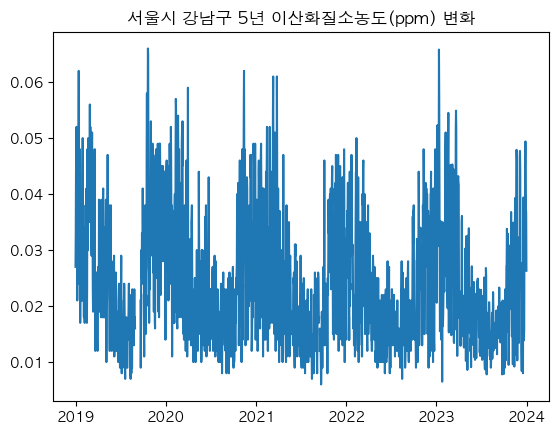

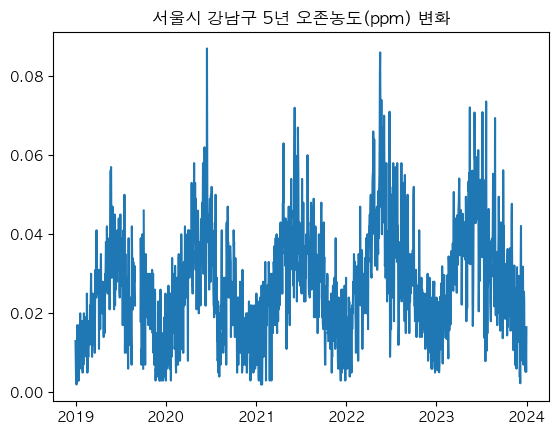

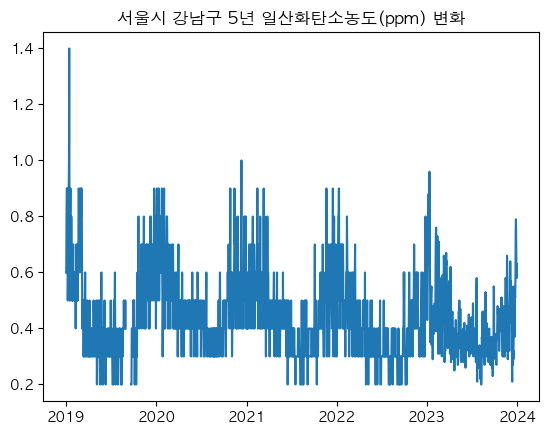

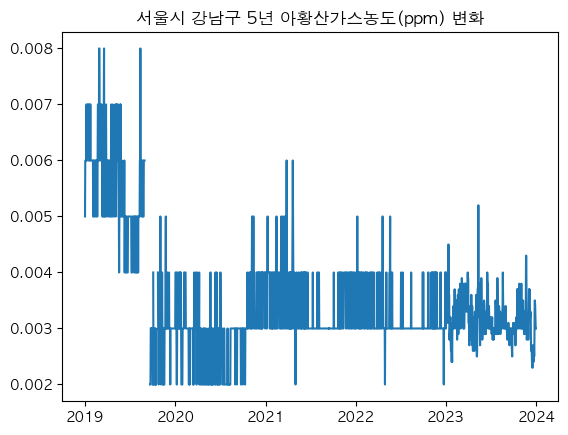

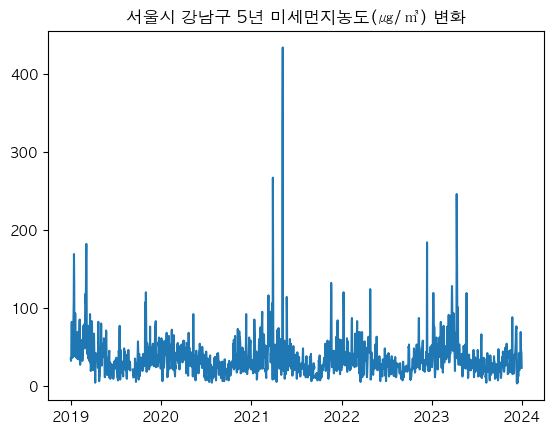

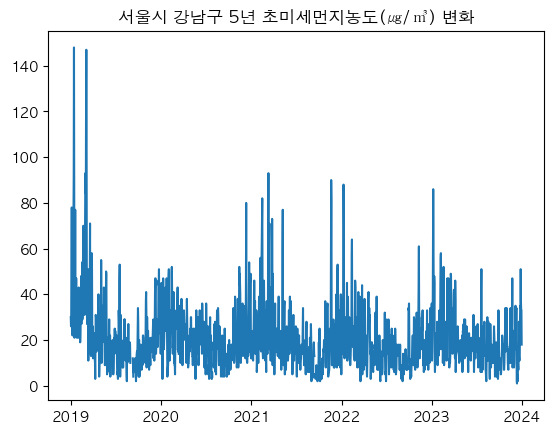

In [23]:
for i in 대기오염전체카피[대기오염전체카피['측정소명'] == '강남구'].iloc[::,2:].columns:
    plt.title(f"서울시 강남구 5년 {i} 변화")
    plt.plot(대기오염전체카피[대기오염전체카피['측정소명'] == '강남구']['측정일시'],대기오염전체카피[대기오염전체카피['측정소명'] == '강남구'][f'{i}'])
    plt.show()

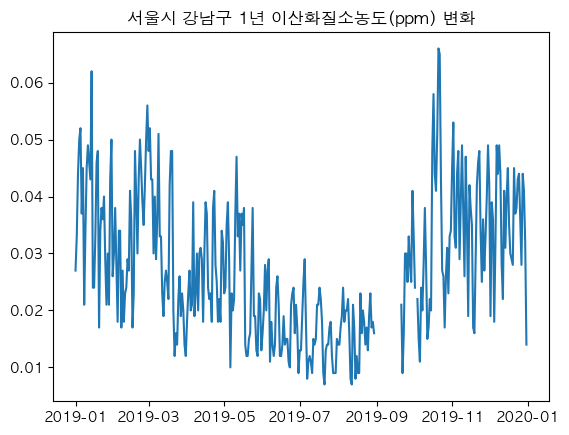

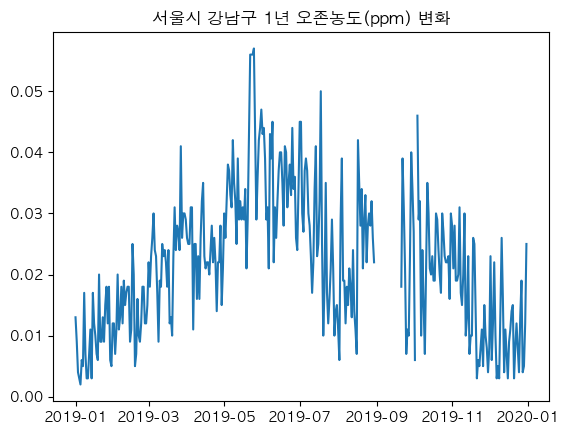

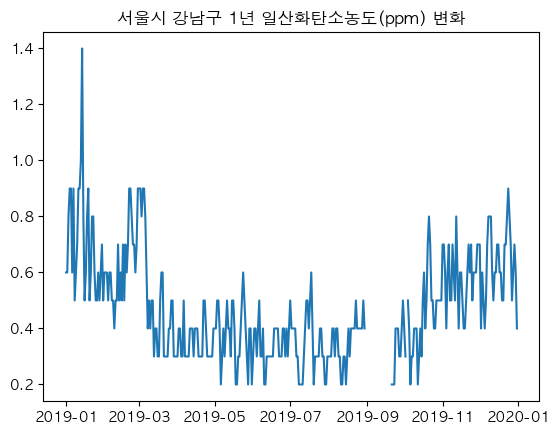

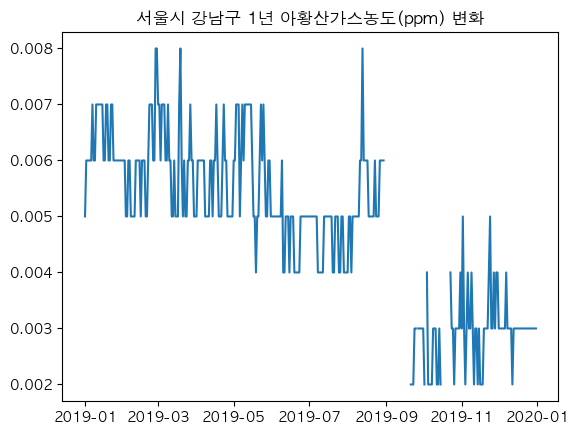

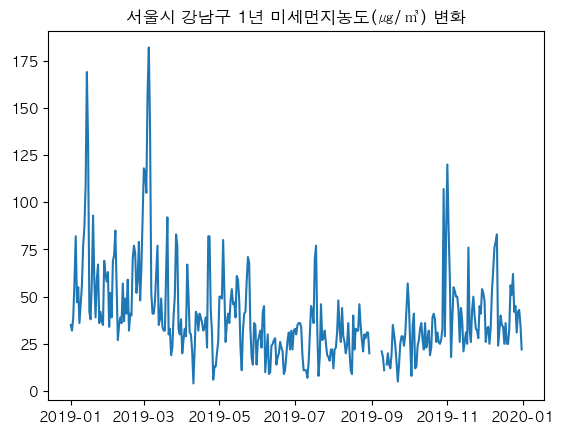

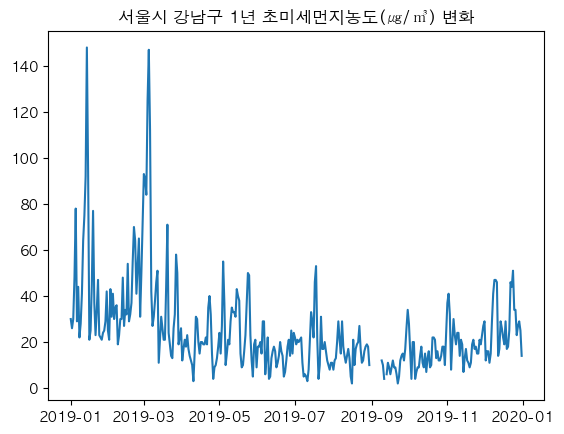

In [24]:
for i in 대기오염카피[대기오염카피['측정소명'] == '강남구'].iloc[::,2:].columns:
    #print(i)
    plt.title(f"서울시 강남구 1년 {i} 변화")
    plt.plot(대기오염카피[대기오염카피['측정소명'] == '강남구']['측정일시'],대기오염카피[대기오염카피['측정소명'] == '강남구'][f'{i}'])
    plt.show()

## 중간에 비었는데 그래프를 보니 채워넣을 수 있을거 같다

In [25]:
대기오염카피[대기오염카피['측정소명'] == '강남구'][(대기오염카피['측정일시'] >= '2019-08-29') ]

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
11513,2019-08-29,강남구,0.018,0.026,0.5,0.006,31.0,18.0
11562,2019-08-30,강남구,0.016,0.022,0.4,0.006,20.0,10.0
11611,2019-08-31,강남구,NaN,NaN,NaN,NaN,NaN,NaN
11660,2019-09-01,강남구,NaN,NaN,NaN,NaN,NaN,NaN
11709,2019-09-02,강남구,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
17495,2019-12-27,강남구,0.028,0.019,0.5,0.003,31.0,23.0
17545,2019-12-28,강남구,0.044,0.004,0.6,0.003,42.0,27.0
17595,2019-12-29,강남구,0.041,0.005,0.7,0.003,43.0,29.0
17645,2019-12-30,강남구,0.032,0.012,0.6,0.003,35.0,25.0


In [26]:
대기오염카피[대기오염카피.isna().any(axis=1)]

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
8,2019-01-01,관악산,0.011,0.024,NaN,0.004,31.0,18.0
54,2019-01-02,관악산,0.019,0.016,NaN,0.004,32.0,19.0
100,2019-01-03,관악산,0.014,0.011,NaN,0.004,23.0,13.0
146,2019-01-04,관악산,0.014,0.025,NaN,0.004,38.0,25.0
192,2019-01-05,관악산,0.017,0.013,NaN,0.004,52.0,30.0
...,...,...,...,...,...,...,...,...
17633,2019-12-29,자연사박물관,NaN,NaN,NaN,NaN,37.0,18.0
17644,2019-12-29,화랑로,0.036,0.007,0.6,0.004,NaN,NaN
17683,2019-12-30,자연사박물관,NaN,NaN,NaN,NaN,31.0,21.0
17694,2019-12-30,화랑로,0.030,0.011,0.5,0.004,NaN,NaN
